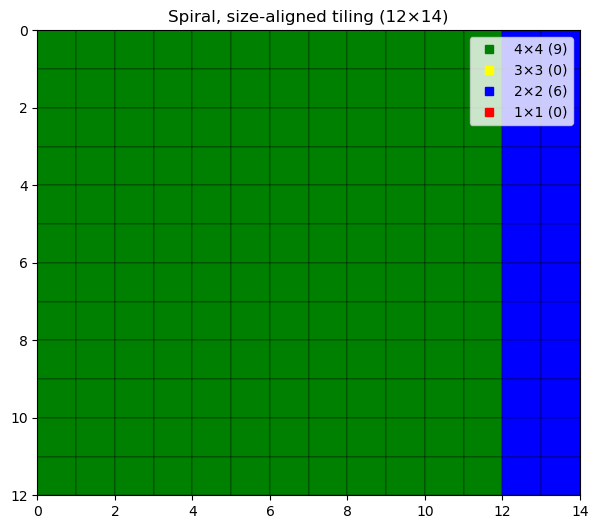

Tiles used:
4x4: 9
3x3: 0
2x2: 6
1x1: 0


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Room size
M, N = 12, 14 

# Tile 
SIZES = [4, 3, 2, 1] # biggest first
COLORS = {4: "green", 3: "yellow", 2: "blue", 1: "red"}
counts = {1: 0, 2: 0, 3: 0, 4: 0}

# Initializing size of grid with zeros
grid = np.zeros((M, N), dtype=int)

def can_place(i, j, s):
    if i + s > M or j + s > N:
        return False
    return np.all(grid[i:i+s, j:j+s] == 0)

def place(i, j, s):
    grid[i:i+s, j:j+s] = s
    counts[s] += 1

def spiral_blocks(rows, cols, r0=None, c0=None):

    if r0 is None: r0 = (rows - 1) // 2
    if c0 is None: c0 = (cols - 1) // 2
    out = []
    r, c = r0, c0
    out.append((r, c)) if 0 <= r < rows and 0 <= c < cols else None
    d = 0
    dirs = [(0,1),(1,0),(0,-1),(-1,0)]  # R, D, L, U
    step = 1
    while len(out) < rows * cols:
        for _ in range(2):
            for _ in range(step):
                r += dirs[d][0]
                c += dirs[d][1]
                if 0 <= r < rows and 0 <= c < cols:
                    out.append((r, c))
                if len(out) >= rows * cols:
                    break
            d = (d + 1) % 4
        step += 1
    return out

# KEY PART: place by sizes, each on its own aligned grid, in spiral order
for s in SIZES:
    n_rows = M // s # how many s×s blocks fit vertically
    n_cols = N // s # how many s×s blocks fit horizontally
    order = spiral_blocks(n_rows, n_cols) # spiral over block indices
    for br, bc in order:
        i, j = br * s, bc * s # align to size s
        if can_place(i, j, s):
            place(i, j, s)

# visualization 
fig, ax = plt.subplots(figsize=(7, 7))
for i in range(M):
    for j in range(N):
        s = grid[i, j]
        rect = patches.Rectangle((j, i), 1, 1, facecolor=COLORS.get(s, "white"), edgecolor="black", linewidth=0.25)
        ax.add_patch(rect)

ax.set_xlim(0, N); ax.set_ylim(0, M)
ax.set_aspect("equal"); ax.invert_yaxis()
ax.set_title(f"Spiral, size-aligned tiling ({M}×{N})")

# legend with counts
for s in SIZES:
    ax.plot([], [], marker="s", ls="", color=COLORS[s], label=f"{s}×{s} ({counts[s]})")
ax.legend(loc="upper right")
plt.show()

print("Tiles used:")
for s in SIZES:
    print(f"{s}x{s}: {counts[s]}")
